## Feature Engineering

In [1]:
# @title imports
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

from google.colab import drive
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# @title gdrive mount
drive.mount('/content/gdrive/', force_remount=True)
gdrive_path = '/content/gdrive' + '/My Drive/ked/'
os.chdir(gdrive_path)
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Mounted at /content/gdrive/
Files in '/content/gdrive/My Drive/ked': ['augusta.csv', 'cleveland.csv', 'youngstown.csv']


In [3]:
# @title load 3 datasets

# load the datasets
augusta = pd.read_csv('augusta.csv')
cleveland = pd.read_csv('cleveland.csv')
youngstown = pd.read_csv('youngstown.csv')
# parse data to datetime
augusta['date'] = pd.to_datetime(augusta['date'], format='%Y%m')
augusta.set_index('date', inplace=True)
cleveland['date'] = pd.to_datetime(cleveland['date'], format='%Y%m')
cleveland.set_index('date', inplace=True)
youngstown['date'] = pd.to_datetime(youngstown['date'], format='%Y%m')
youngstown.set_index('date', inplace=True)

# Applying first differencing
augusta['unit donor'] = np.log(augusta['total unit']).diff() - augusta['total donor'].diff()
augusta = augusta.dropna()

cleveland['unit donor'] = np.log(cleveland['total unit']).diff() - cleveland['total donor'].diff()
cleveland = cleveland.dropna()

youngstown['unit donor'] = np.log(youngstown['total unit']).diff() - youngstown['total donor'].diff()
youngstown = youngstown.dropna()


locations = [augusta, cleveland, youngstown]
locations_names = ['Augusta', 'Cleveland', 'Youngstown']

In [4]:
# @title features sample
augusta.head(3)

,total donor,new donor,total return donor,return donor,month donor,total unit,new unit,total return unit,return unit,month unit,unit donor
date,,,,,,,,,,,
2019-02-01,606,112,494,459,35,2558,309,2249,2164,85,57.814621
2019-03-01,518,95,423,387,36,2233,246,1987,1899,88,87.864120
2019-04-01,576,131,445,379,66,2531,396,2135,1953,182,-57.874731


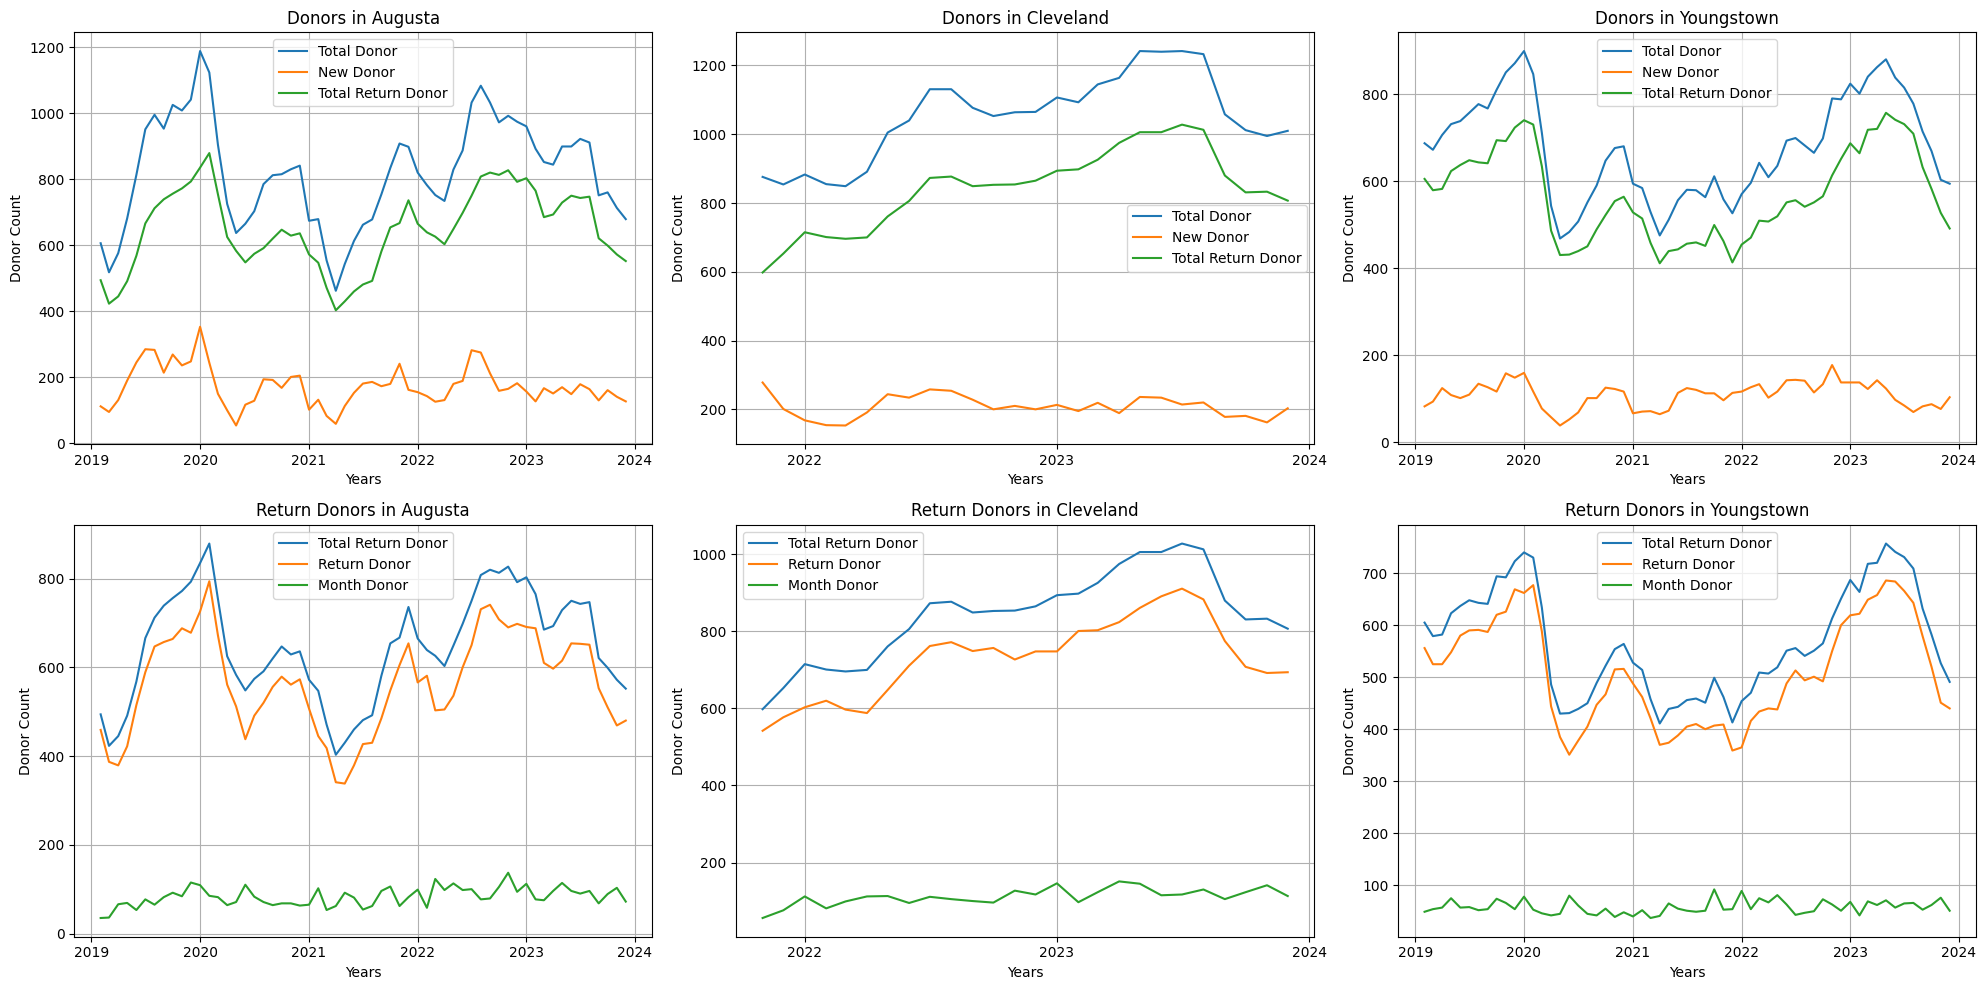

In [5]:
# @title donor data of 3 locations

# Create a subplot grid of 2 row by 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# row  1
axs[0,0].plot(augusta.index, augusta['total donor'], label='Total Donor')
axs[0,0].plot(augusta.index, augusta['new donor'], label='New Donor')
axs[0,0].plot(augusta.index, augusta['total return donor'], label='Total Return Donor')
axs[0,0].set_title('Donors in Augusta')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Donor Count')
axs[0,0].legend()
axs[0,0].grid(True)

axs[0,1].plot(cleveland.index, cleveland['total donor'], label='Total Donor')
axs[0,1].plot(cleveland.index, cleveland['new donor'], label='New Donor')
axs[0,1].plot(cleveland.index, cleveland['total return donor'], label='Total Return Donor')
axs[0,1].set_title('Donors in Cleveland')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Donor Count')
axs[0,1].legend()
axs[0,1].grid(True)
axs[0,1].xaxis.set_major_locator(mdates.YearLocator())
axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[0,2].plot(youngstown.index, youngstown['total donor'], label='Total Donor')
axs[0,2].plot(youngstown.index, youngstown['new donor'], label='New Donor')
axs[0,2].plot(youngstown.index, youngstown['total return donor'], label='Total Return Donor')
axs[0,2].set_title('Donors in Youngstown')
axs[0,2].set_xlabel('Years')
axs[0,2].set_ylabel('Donor Count')
axs[0,2].legend()
axs[0,2].grid(True)
# row  2
axs[1,0].plot(augusta.index, augusta['total return donor'], label='Total Return Donor')
axs[1,0].plot(augusta.index, augusta['return donor'], label='Return Donor')
axs[1,0].plot(augusta.index, augusta['month donor'], label='Month Donor')
axs[1,0].set_title('Return Donors in Augusta')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Donor Count')
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(cleveland.index, cleveland['total return donor'], label='Total Return Donor')
axs[1,1].plot(cleveland.index, cleveland['return donor'], label='Return Donor')
axs[1,1].plot(cleveland.index, cleveland['month donor'], label='Month Donor')
axs[1,1].set_title('Return Donors in Cleveland')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Donor Count')
axs[1,1].legend()
axs[1,1].grid(True)
axs[1,1].xaxis.set_major_locator(mdates.YearLocator())
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[1,2].plot(youngstown.index, youngstown['total return donor'], label='Total Return Donor')
axs[1,2].plot(youngstown.index, youngstown['return donor'], label='Return Donor')
axs[1,2].plot(youngstown.index, youngstown['month donor'], label='Month Donor')
axs[1,2].set_title('Return Donors in Youngstown')
axs[1,2].set_xlabel('Years')
axs[1,2].set_ylabel('Donor Count')
axs[1,2].legend()
axs[1,2].grid(True)

plt.tight_layout()
plt.show()

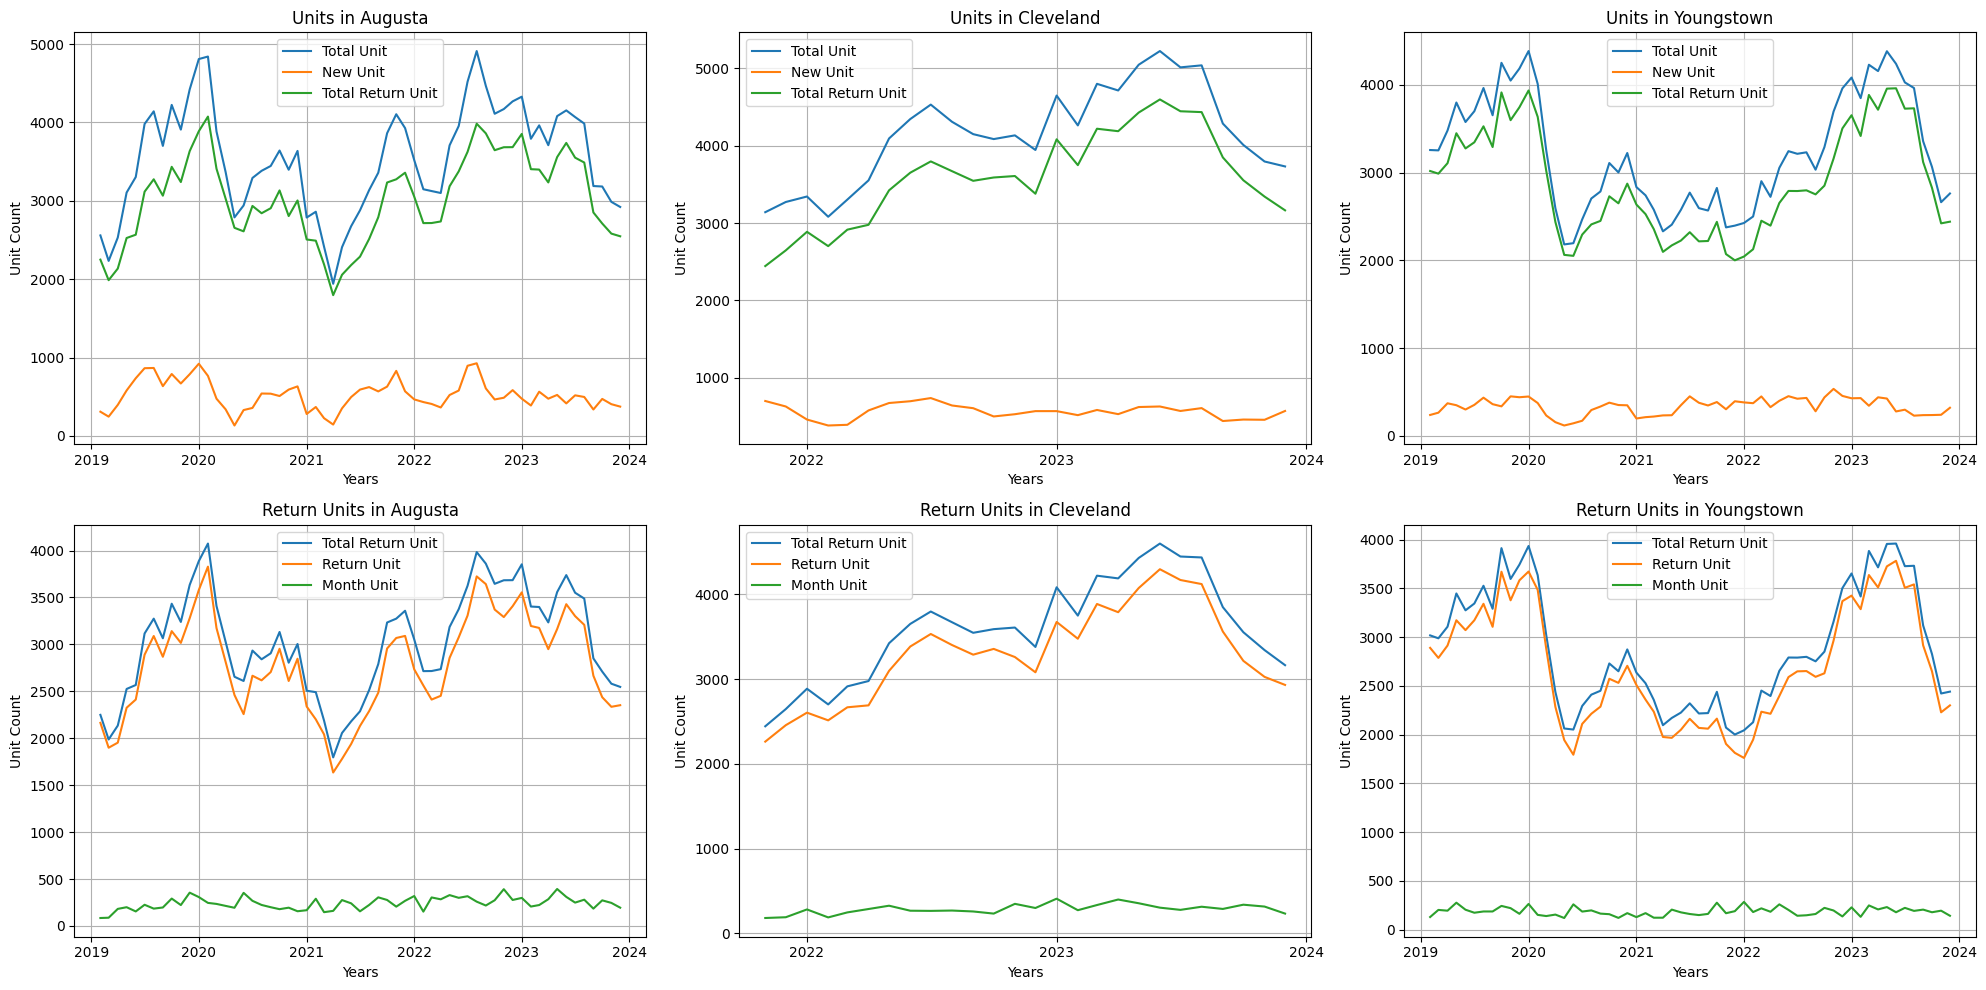

In [6]:
# @title unit data of 3 locations

# Create a subplot grid of 2 row by 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# row  1
axs[0,0].plot(augusta.index, augusta['total unit'], label='Total Unit')
axs[0,0].plot(augusta.index, augusta['new unit'], label='New Unit')
axs[0,0].plot(augusta.index, augusta['total return unit'], label='Total Return Unit')
axs[0,0].set_title('Units in Augusta')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Unit Count')
axs[0,0].legend()
axs[0,0].grid(True)

axs[0,1].plot(cleveland.index, cleveland['total unit'], label='Total Unit')
axs[0,1].plot(cleveland.index, cleveland['new unit'], label='New Unit')
axs[0,1].plot(cleveland.index, cleveland['total return unit'], label='Total Return Unit')
axs[0,1].set_title('Units in Cleveland')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Unit Count')
axs[0,1].legend()
axs[0,1].grid(True)
axs[0,1].xaxis.set_major_locator(mdates.YearLocator())
axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[0,2].plot(youngstown.index, youngstown['total unit'], label='Total Unit')
axs[0,2].plot(youngstown.index, youngstown['new unit'], label='New Unit')
axs[0,2].plot(youngstown.index, youngstown['total return unit'], label='Total Return Unit')
axs[0,2].set_title('Units in Youngstown')
axs[0,2].set_xlabel('Years')
axs[0,2].set_ylabel('Unit Count')
axs[0,2].legend()
axs[0,2].grid(True)
# row  2
axs[1,0].plot(augusta.index, augusta['total return unit'], label='Total Return Unit')
axs[1,0].plot(augusta.index, augusta['return unit'], label='Return Unit')
axs[1,0].plot(augusta.index, augusta['month unit'], label='Month Unit')
axs[1,0].set_title('Return Units in Augusta')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Unit Count')
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(cleveland.index, cleveland['total return unit'], label='Total Return Unit')
axs[1,1].plot(cleveland.index, cleveland['return unit'], label='Return Unit')
axs[1,1].plot(cleveland.index, cleveland['month unit'], label='Month Unit')
axs[1,1].set_title('Return Units in Cleveland')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Unit Count')
axs[1,1].legend()
axs[1,1].grid(True)
axs[1,1].xaxis.set_major_locator(mdates.YearLocator())
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[1,2].plot(youngstown.index, youngstown['total return unit'], label='Total Return Unit')
axs[1,2].plot(youngstown.index, youngstown['return unit'], label='Return Unit')
axs[1,2].plot(youngstown.index, youngstown['month unit'], label='Month Unit')
axs[1,2].set_title('Return Units in Youngstown')
axs[1,2].set_xlabel('Years')
axs[1,2].set_ylabel('Unit Count')
axs[1,2].legend()
axs[1,2].grid(True)

plt.tight_layout()
plt.show()

### 1.   ARIMA (AutoRegressive Integrated Moving Average)
In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. [source](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average). ARIMA works with a single time series data feature, which is the variable you want to forecast.


#### 1.a. Augmented Dickey-Fuller (ADF) Test
In statistics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models. [source](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test). The purpose of the ADF test is to determine whether the entire time series is stationary or not to identify whether the mean, variance, and covariance of the data are constant over time.

In [7]:
# @title ADF test of 3 locations
def adf_test(series):
    result = adfuller(series)
    return {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Critical Values": result[4]
    }

results = []
features = ['total donor', 'total unit', 'unit donor']
for location, location_name in zip(locations, locations_names):
    for feature in features:
        test_result = adf_test(location[feature])
        result_dict = {
            'Location': location_name,
            'Feature': feature,
            'ADF Statistic': test_result['ADF Statistic'],
            'p-value': test_result['p-value'],
            'Critical Value (1%)': test_result['Critical Values']['1%'],
            'Critical Value (5%)': test_result['Critical Values']['5%'],
            'Critical Value (10%)': test_result['Critical Values']['10%'],
        }
        results.append(result_dict)
results_df = pd.DataFrame(results)
display(results_df)

,Location,Feature,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,Augusta,total donor,-3.719729,0.003844,-3.550670,-2.913766,-2.594624
1,Augusta,total unit,-3.623228,0.005332,-3.552928,-2.914731,-2.595137
2,Augusta,unit donor,-4.736317,0.000072,-3.555273,-2.915731,-2.595670
3,Cleveland,total donor,-2.090596,0.248313,-3.737709,-2.992216,-2.635747
4,Cleveland,total unit,-3.075281,0.028437,-3.924019,-3.068498,-2.673893
5,Cleveland,unit donor,-3.673377,0.004504,-3.723863,-2.986489,-2.632800
6,Youngstown,total donor,-2.767322,0.063095,-3.550670,-2.913766,-2.594624
7,Youngstown,total unit,-2.619419,0.089050,-3.552928,-2.914731,-2.595137
8,Youngstown,unit donor,-4.358030,0.000352,-3.548494,-2.912837,-2.594129


#### 1.b. Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF)
ACF and PACF are important functions in analyzing a time series. They generally produce plots that are very important in finding the values p, q and r for Autoregressive (AR) and Moving Average (MA) models. [source](https://www.linkedin.com/pulse/time-series-analysis-short-introduction-#:~:text=Autocorrelation%20function%20(ACF)%20and%20Partial,Moving%20Average%20(MA)%20models.)

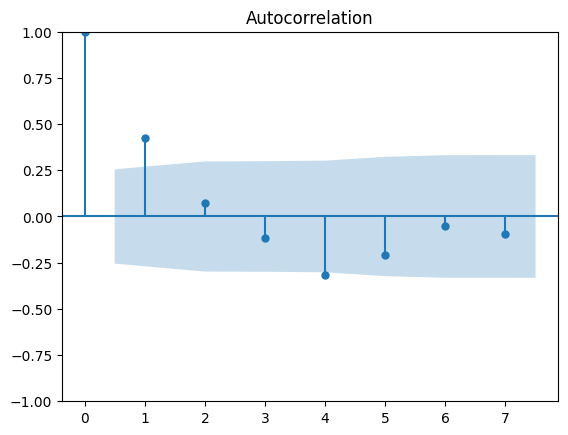

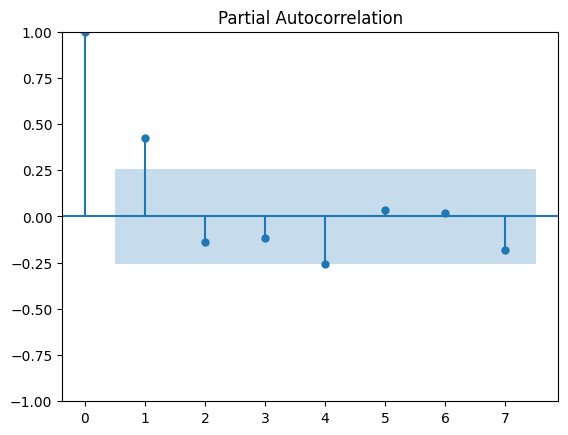

In [8]:
# @title ACF and PACF of 3 locations

plot_acf(augusta['unit donor'], lags=7)
plot_pacf(augusta['unit donor'], lags=7)
plt.show()
# plot_acf(cleveland['unit donor'], lags=15)
# plot_pacf(cleveland['unit donor'], lags=15)
# plt.show()
# plot_acf(youngstown['unit donor'], lags=15)
# plot_pacf(youngstown['unit donor'], lags=15)
# plt.show()

In [9]:
# ARIMA

# np.random.seed(0)
# dates = pd.date_range("2020-01", periods=60, freq="M")
# data = pd.DataFrame(np.random.randn(60, 11), index=dates, columns=[f"Feature_{i}" for i in range(11)])

# Select a specific column to forecast, for example, 'Feature_0'
selected_column = augusta['unit donor']

# Fit ARIMA model on selected column
model = ARIMA(selected_column, order=(1, 0, 1))
model_fit = model.fit()

# Print the summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             unit donor   No. Observations:                   59
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -335.334
Date:                Tue, 14 May 2024   AIC                            678.667
Time:                        09:26:20   BIC                            686.978
Sample:                    02-01-2019   HQIC                           681.911
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2542     15.698     -0.016      0.987     -31.022      30.514
ar.L1          0.2296      0.253      0.907      0.364      -0.267       0.726
ma.L1          0.2427      0.228      1.066      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
forecast = model_fit.get_forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


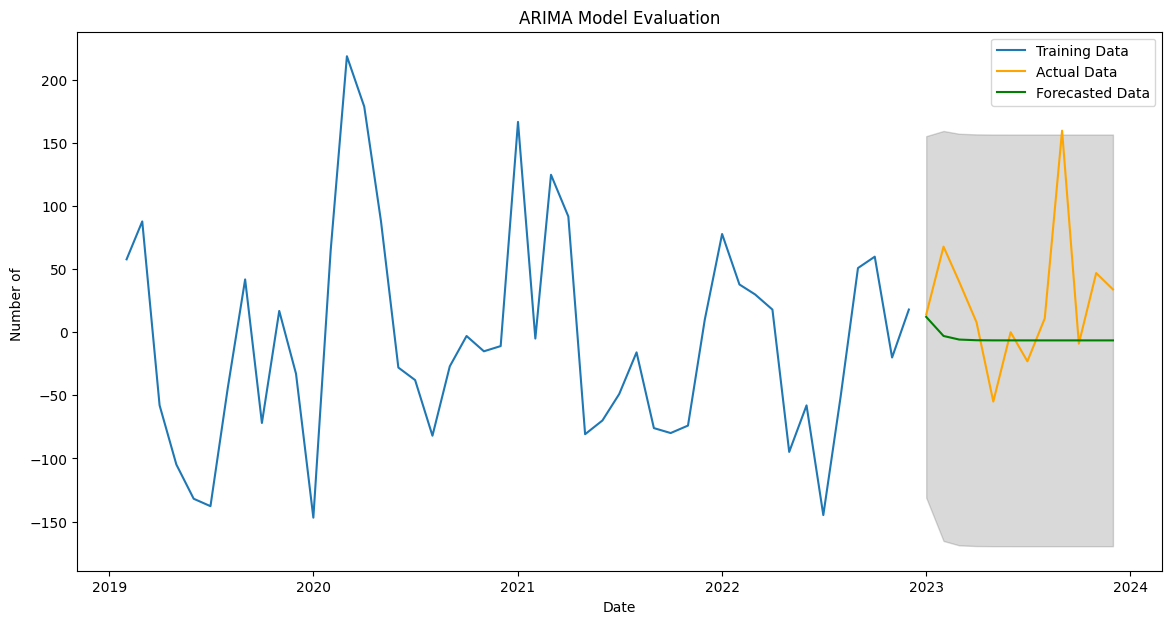

MSE: 3532.9101290371436
RMSE: 59.43828840938426


In [15]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(augusta['unit donor']) * 0.8)
train, test = augusta['unit donor'][0:train_size], selected_column[train_size:len(selected_column)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of ')
plt.legend()
plt.show()

print('MSE:', mse)
print('RMSE:', rmse)

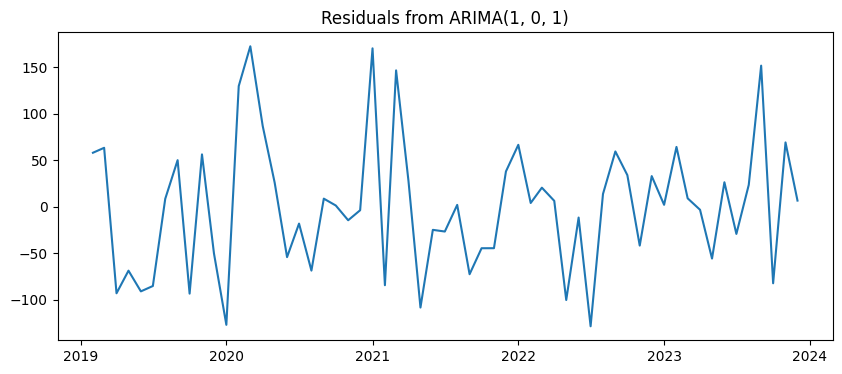

In [12]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA(1, 0, 1)')
plt.show()

Ljung-Box test p-value: lb_pvalue


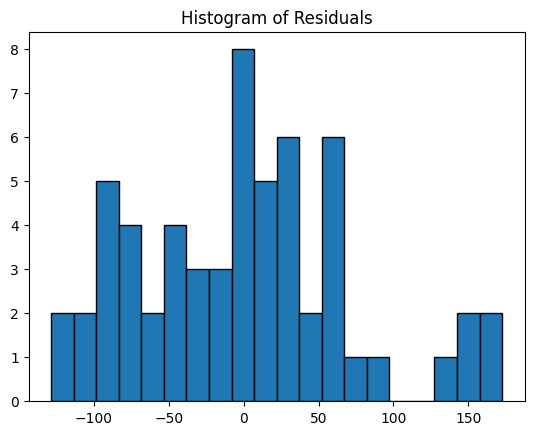

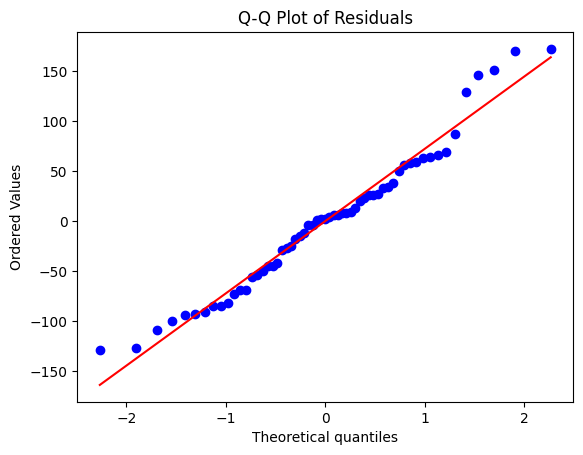

In [13]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[7], return_df=False)
print("Ljung-Box test p-value:", lb_pvalue)

# Histogram of residuals
plt.figure()
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
from scipy.stats import probplot
plt.figure()
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming 'residuals' is a pandas Series of your residuals
lb_test = acorr_ljungbox(residuals, lags=[7], return_df=True)
print(lb_test)

    lb_stat  lb_pvalue
7  6.244241   0.511538


###### methods to use with three different data divisions (year, after covid, all data) annually, quarterly, monthly

*   Autoregressive Neural Networks (NNETAR) - no

*   Seasonal Auto-Regressive Integrated Moving Average (SARIMA)
*   STL with Exponential Smoothing (ETS)
*   Holt-Winters (HW)
*   Autoregressive Integrated Moving Average (ARIMA)
*   Double-Seasonal Holt-Winters(DSHW) and
*   Exponential smoothing state space model with Box-Cox transformation, ARMA errors, Trend and Seasonal components (TBATS)


###### evals

*   Mean Absolute Error (MAE) and
*   Root Mean Square Error (RMSE)

How to eval against future real donor data

##### Models
Why Each Model Could Be Suitable for Plasma Donations:

ARIMA (AutoRegressive Integrated Moving Average):
- Strengths:
Effective for data with clear trends and where seasonal effects are manageable with autoregressive and moving average components.
- Best Use:
For straightforward time series data where trends and autoregressive patterns are dominant.

Exponential Smoothing (ETS):
- Strengths:
Excellent for data with both trend and seasonal components. Offers simple, double, and triple smoothing options.
- Best Use:
For time series with clear seasonality and trends, which is often the case with monthly plasma donations.

TBATS (Trigonometric, Box-Cox, ARMA, Trend, and Seasonal):
- Strengths:
Highly versatile, can handle multiple seasonal patterns, and useful for complex seasonal structures.
- Best Use:
For complex seasonal patterns in plasma donation data, particularly if there are multiple seasonal cycles (e.g., monthly and yearly).

Prophet:
- Strengths:
User-friendly, handles missing data well, and incorporates holiday effects.
- Best Use:
For business-centric time series data with clear seasonal and holiday effects, which might affect donation patterns around holidays or special events.

Random Forest:
- Strengths:
Handles complex patterns and external variables well.
- Best Use:
When you have external factors influencing plasma donations, such as campaigns, public events, or climate conditions, which can be incorporated as features.

###### Resources

* [Autoregression Models for Time Series Forecasting With Python](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)
* [A New Coefficient of Correlation](https://towardsdatascience.com/a-new-coefficient-of-correlation-64ae4f260310)
* [Forecasting: Principles and Practice](https://otexts.com/fpp2/)
* [The autoregressive neural network architecture of the Boltzmann distribution of pairwise interacting spins systems](https://www.nature.com/articles/s42005-023-01416-5#Sec6)
* [11 Classical Time Series Forecasting Methods in MATLAB](https://www.mathworks.com/matlabcentral/fileexchange/74211-11-classical-time-series-forecasting-methods-in-matlab?s_tid=prof_contriblnk)
* [A hybrid neural network based model for blood donation forecasting](https://www.sciencedirect.com/science/article/pii/S1532046423002095?casa_token=k4ufjCLZNREAAAAA:bZbHWo_vCy1kOn-vkXNUE6TAVgx6NPnwwO6SBgI4OLMScqHou3x5I6VjIz5LHyBV2ETIw15ofA)
* [Reducing uncertainty in demand for blood](https://www.sciencedirect.com/science/article/pii/S2211692315300047)
* [Blood Donation Prediction using Artificial Neural Network](https://www.researchgate.net/profile/Alaa-M-Barhoom/publication/336990435_Blood_Donation_Prediction_using_Artificial_Neural_Network/links/5dbde8a992851c818025faf8/Blood-Donation-Prediction-using-Artificial-Neural-Network.pdf)
* [Applied Causal Inference Powered by ML and AI](https://arxiv.org/pdf/2403.02467v1.pdf)
